In [2]:
import pandas as pd
#com fer grafic

In [3]:
#aqui ens baixem les dades de les molecules amb el pIC50 real
df_true = pd.read_csv('test_checkpoints_class/fold_0/test_full.csv')
print(df_true.columns)

Index(['SMILES', 'pIC50'], dtype='object')


In [4]:
#aqui ens baixem les dades de les molecules amb el pIC50 que ens ha predit el model creat
df_preds = pd.read_csv('test_preds_class.csv')
print(df_preds.columns)

#com que tenen el mateix nom canviem el nom de la columna pIC50 en aquest data frame per preds
#aixi identificarem millor les prediccions

df_preds.rename(columns={'pIC50': 'preds'}, inplace=True)
print(df_preds.columns)

Index(['SMILES', 'pIC50'], dtype='object')
Index(['SMILES', 'preds'], dtype='object')


In [5]:
df = df_true.merge(df_preds, on='SMILES', how='inner')

# 'how' determina cómo se realiza la unión, en este caso, 'inner' toma solo las moléculas comunes

print(df)

                                               SMILES  pIC50     preds
0   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.713995
1   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.326059
2   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.872838
3   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.341301
4   CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.778836
..                                                ...    ...       ...
61  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.717162
62  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.331802
63  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.795286
64  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.640524
65  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.308809

[66 rows x 3 columns]


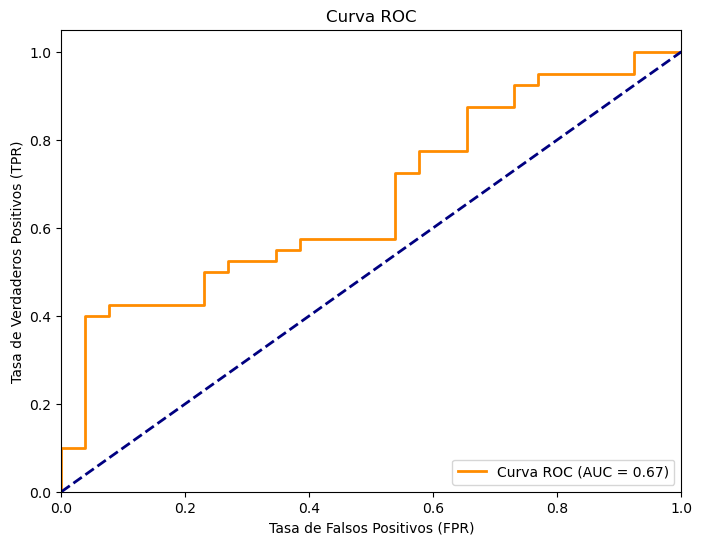

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df.pIC50, df.preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

